# 1.initial data understanding and exploration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)

In [2]:
# load dataset
df = pd.read_csv("C:/Users/amees/OneDrive/Desktop/Ecommerce_Customer_Segmentation/data/online_retail.csv")

# show first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#for understanding the dataset
df.shape


#we got 541,909 rows (large, realistic dataset)
#8 columns

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# NOTES:-----

# we got
# Column       Meaning
# InvoiceNo    Transaction ID

# StockCode    Product ID

# Description  Product name

# Quantity     Number of items purchased

# InvoiceDate  Date & time of purchase

# UnitPrice    Price per unit

# CustomerID   Unique customer ID

# Country      Customer country


# Important observation :
# InvoiceDate is object, should be datetime
# CustomerID has missing values
# Description also has some missing values

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# NOTES:----

# Statistical summary (df.describe())
# important insights found:
# 1.Negative Quantity -cancelled orders
# 2.Negative UnitPrice - invalid transactions
# 3.Large max values - wholesalers exist

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# NOTES:----

# Missing values (df.isnull().sum())
# found:
# CustomerID: 135,080 missing
# Description: 1,454 missing
# its normal for this dataset.
# For customer segmentation:
# Rows without CustomerID must be removed(Because customer segmentation is
# done at the customer level,
# and without CustomerID, we don’t know which 
# customer the transaction belongs to.)


# 2.DATA PREPARATION
DATA CLEANING AND PREPROCESSING


In [10]:
# a.Convert InvoiceDate to datetime

# InvoiceDate is currently stored as text (object).
# To calculate recency, perform time-based analysis, and group transactions by date, it must be converted to
# a datetime format.

In [11]:
# Convert InvoiceDate column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Verify the conversion
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [12]:
#InvoiceDate was converted from object type to datetime to enable time-based analysis such as recency calculation.

In [13]:
# b.Remove rows with missing CustomerID

# Customer segmentation is done at the customer level.
# If CustomerID is missing, we cannot:
# *Identify the customer
# *Calculate frequency or monetary value
# *Assign the transaction to any segment

In [14]:
# for Check shape before removing missing CustomerID
df.shape

(541909, 8)

In [15]:
#for Remove rows where CustomerID is missing
df = df.dropna(subset=['CustomerID'])

# for Check shape after removal
df.shape

(406829, 8)

In [16]:
#Rows with missing CustomerID were removed because customer-level analysis requires unique customer identification.

In [17]:
# c.Remove invalid transactions

# This includes:

# *Negative or zero Quantity (cancelled orders)
# *Zero or negative UnitPrice (invalid transactions)

In [18]:
# --Remove invalid Quantity and UnitPrice

In [19]:
# for Check how many invalid Quantity values exist
(df['Quantity'] <= 0).sum()



8905

In [20]:
df.shape

(406829, 8)

In [21]:
# Remove rows with Quantity <= 0
df = df[df['Quantity'] > 0]

# Shape after removal
df.shape

(397924, 8)

In [22]:
# Rows with Quantity ≤ 0 were removed as they represent cancelled or returned transactions and do 
# not reflect actual customer purchases.

In [23]:
#unitprice

# for Check how many invalid UnitPrice values exist
(df['UnitPrice'] <= 0).sum()

40

In [24]:
df.shape

(397924, 8)

In [25]:
# for Remove rows with invalid UnitPrice
df = df[df['UnitPrice'] > 0]

In [26]:
#shape after removal
df.shape

(397884, 8)

In [27]:
# Rows with UnitPrice ≤ 0 were removed as price values cannot
# be zero or negative and such entries represent invalid transactions
# that would distort monetary analysis.

In [28]:
#{CREATE TOTAL PRICE

# This is the core feature for customer segmentation.
# Because:
# Customer value =
# how much they buy × how much they spend}

In [29]:
# d.Feature Engineering
### Creating Total Transaction Value

In [30]:
# Creating TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [31]:
# A new feature `TotalPrice` was created to represent the total monetary value of each transaction.  
# This feature is essential for calculating customer-level monetary metrics during segmentation.

## Customer-Level Aggregation (RFM Metrics)

In [32]:
#1.finding reference date:we need reference date to calculate recency

In [33]:
# Setting reference date as one day after the last transaction
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

reference_date

Timestamp('2011-12-10 12:50:00')

In [34]:
#2.CREATING RFM TABLE

In [35]:
# Create RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                         # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [36]:
# Customer-level RFM metrics were created:
# - Recency: Number of days since the customer’s last purchase
# - Frequency: Number of unique transactions made by the customer
# - Monetary: Total amount spent by the customer

# These metrics form the foundation for customer segmentation.

# #RFM Data Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
# Initialize scaler
scaler = StandardScaler()

# Scale RFM values
rfm_scaled = scaler.fit_transform(rfm)

# Convert back to DataFrame
rfm_scaled = pd.DataFrame(
    rfm_scaled,
    index=rfm.index,
    columns=rfm.columns
)

rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2.334574,-0.425097,8.358668
12347.0,-0.905340,0.354417,0.250966
12348.0,-0.175360,-0.035340,-0.028596
12349.0,-0.735345,-0.425097,-0.033012
12350.0,2.174578,-0.425097,-0.191347


In [39]:
#RFM features were standardized using StandardScaler to ensure that all variables
#contribute equally to the clustering process.

# Customer Segmentation Using K-Means Clustering

## Elbow Method for Optimal Number of Clusters

C:\Users\amees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

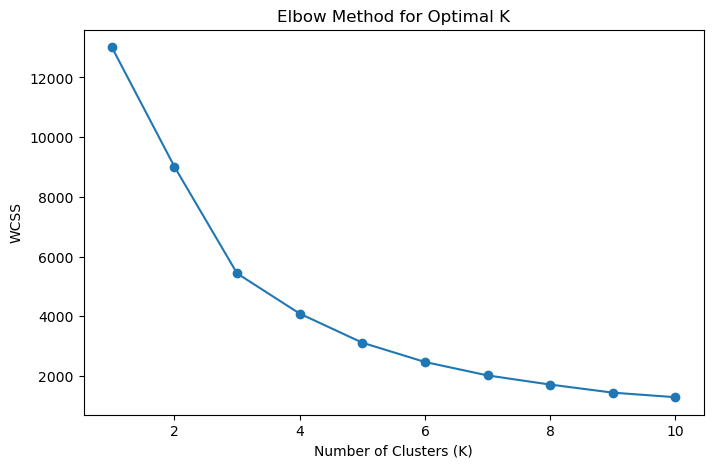

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Within-Cluster Sum of Squares (WCSS)
wcss = []

# Try different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# now Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [41]:
### Elbow Method Observation

# The Elbow Method was used to determine the optimal number of clusters.  
# A sharp decrease in WCSS was observed up to K = 3, after which the reduction became gradual.  
# This indicates that K = 3 is the optimal number of clusters, as adding more clusters does not significantly improve the model.

## Applying K-Means Clustering

In [42]:
# K-Means clustering was applied to the standardized RFM
# features to segment customers into distinct groups based on their purchasing behavior.

In [43]:
from sklearn.cluster import KMeans

# Apply K-Means with optimal K = 3
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

# View first few rows
rfm_scaled.head()

C:\Users\amees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,2.334574,-0.425097,8.358668,0
12347.0,-0.905340,0.354417,0.250966,1
12348.0,-0.175360,-0.035340,-0.028596,1
12349.0,-0.735345,-0.425097,-0.033012,1
12350.0,2.174578,-0.425097,-0.191347,0


In [44]:
#Add cluster labels to original RFM table

rfm['Cluster'] = rfm_scaled['Cluster']
rfm.head()

#Now your actual customer data has cluster info

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,77183.60,0
12347.0,2,7,4310.00,1
12348.0,75,4,1797.24,1
12349.0,19,1,1757.55,1
12350.0,310,1,334.40,0


### Cluster Distribution

In [45]:
# Number of customers in each cluster
rfm['Cluster'].value_counts().sort_index()

0    1082
1    3230
2      26
Name: Cluster, dtype: int64

In [46]:
#visualizing cluster distribution

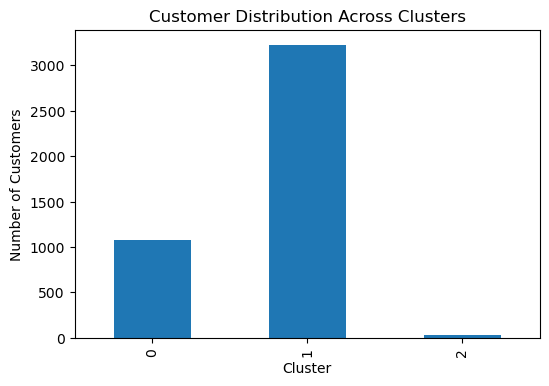

In [47]:
import matplotlib.pyplot as plt

rfm['Cluster'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(6,4)
)

plt.title('Customer Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [48]:
#from graph :The customer base is not evenly distributed. Most customers fall into Cluster 1,
# while Cluster 2 contains a very small number of customers who may represent high-value or special behavior

### Cluster Profiling using RFM Metrics

In [49]:
# Average RFM values for each cluster
rfm.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,247.106285,1.582255,631.424206
1,41.454180,4.672755,1855.942345
2,6.038462,66.423077,85904.351538


In [50]:
### Cluster Interpretation

#   Cluster 0 (Inactive Customers):  
#   Customers in this cluster have high recency, low frequency, and low monetary value.  
#   This indicates customers who have not purchased recently and contribute minimal revenue.

#   Cluster 1 (Regular Customers): 
#   This cluster represents customers with moderate recency, frequency, and spending.  
#   These customers form the largest group and contribute steady revenue.

#   Cluster 2 (High-Value Customers):  
#   Customers in this cluster have very low recency, very high purchase  frequency, and high monetary value.  
#   These are loyal and high-value customers who contribute significantly to overall revenue.

### Cluster Labeling

In [51]:
# Cluster 0: Inactive Customers  
# Cluster 1: Regular Customers  
# Cluster 2: High-Value Customers

## Alternative Clustering Techniques

### DBSCAN Clustering

In [52]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm
# that groups together points that are closely packed while marking points in low-density
# regions as outliers. Unlike K-Means, DBSCAN does not require specifying the number of clusters
# in advance and is effective at detecting arbitrarily shaped clusters.

In [53]:
from sklearn.cluster import DBSCAN
import numpy as np

# Applying DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(rfm_scaled)

# Add DBSCAN labels to RFM table
rfm['DBSCAN_Cluster'] = dbscan_labels

# View cluster distribution
rfm['DBSCAN_Cluster'].value_counts()

 0    3219
 1    1078
-1      41
Name: DBSCAN_Cluster, dtype: int64

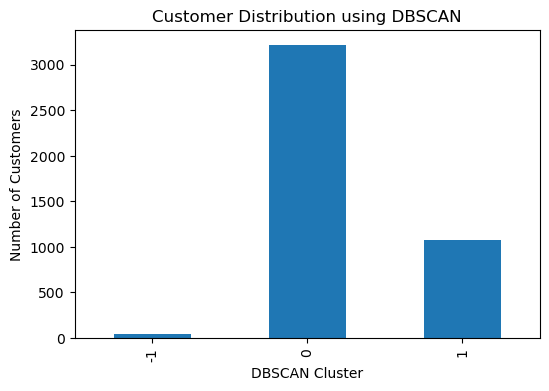

In [54]:
#visualizing DBSCAN clusters

import matplotlib.pyplot as plt

rfm['DBSCAN_Cluster'].value_counts().sort_index().plot(
    kind='bar', figsize=(6,4)
)

plt.title('Customer Distribution using DBSCAN')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [55]:
#### DBSCAN Cluster Interpretation

# DBSCAN identified two dense customer clusters and a small group of outliers.
# Cluster 0 represents the largest group of customers with regular purchasing behavior.
# Cluster 1 represents a distinct customer segment with comparatively different purchasing
# patterns. Customers labeled as -1 are considered noise and represent outliers with
# irregular or exceptional behavior. DBSCAN is particularly useful for detecting such
# outliers, unlike K-Means clustering.

### Hierarchical Clustering

In [56]:
# Hierarchical clustering builds a hierarchy of clusters by progressively merging
# or splitting customer groups based on distance. Unlike K-Means, it does not
# require pre-specifying the number of clusters and is useful for understanding
# cluster relationships through a dendrogram.

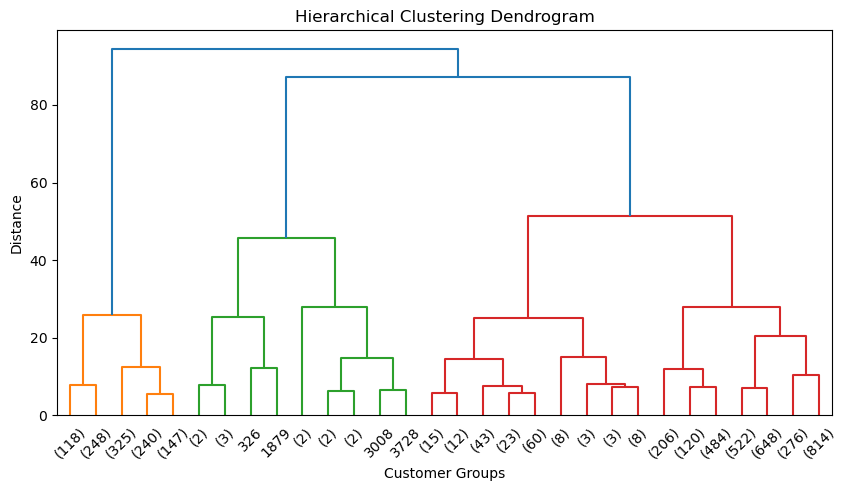

In [57]:
#plotting dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create linkage matrix
linked = linkage(rfm_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Groups')
plt.ylabel('Distance')
plt.show()

In [58]:
# The dendrogram shows how customers are grouped hierarchically based on similarity in RFM features.
# The height at which clusters merge represents the distance between customer groups.
# By cutting the dendrogram at an appropriate distance, we can decide the optimal number of clusters

In [59]:
#Applying Agglomerative Hierarchical clustering

In [60]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)
rfm['Hierarchical_Cluster'] = hc.fit_predict(rfm_scaled)

# Check cluster counts
rfm['Hierarchical_Cluster'].value_counts()

0    3245
1    1078
2      15
Name: Hierarchical_Cluster, dtype: int64

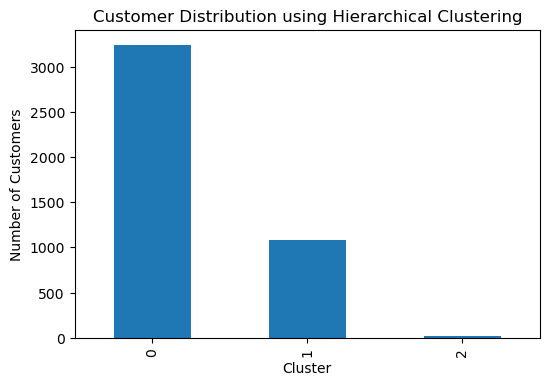

In [61]:
#VISUALIZE HIERARCHICAL CLUSTERS

import matplotlib.pyplot as plt

rfm['Hierarchical_Cluster'].value_counts().sort_index().plot(
    kind='bar', figsize=(6,4)
)

plt.title('Customer Distribution using Hierarchical Clustering')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [62]:
### Hierarchical Cluster Interpretation

# Hierarchical clustering grouped customers into three distinct segments based on
# their RFM values. Cluster 0 contains the largest number of customers and represents
# low-value or inactive customers. Cluster 1 represents regular customers with
# moderate purchasing behavior. Cluster 2 contains a very small group of high-value
# customers who contribute significantly to revenue.

# The dendrogram helps visualize how customer groups are merged based on similarity,
# making hierarchical clustering useful for exploratory analysis.

# comparison and Final Model Selection

In [63]:
# In this project, three clustering techniques were applied to segment customers:
# K-Means, DBSCAN, and Hierarchical Clustering.

# K-Means produced well-balanced and easily interpretable clusters based on RFM metrics.
# DBSCAN was effective in identifying outliers but resulted in less stable customer groupings.
# Hierarchical clustering provided valuable visual insights through dendrograms but was computationally 
# expensive for large datasets.

# Based on cluster interpretability, stability, and business usefulness, K-Means was selected as the final 
# clustering model.

# K-Means clustering was chosen as the final segmentation technique because:
# - It produced clearly distinguishable customer segments
# - The clusters were balanced and business-interpretable
# - It aligned well with RFM-based customer behavior
# - It is scalable and suitable for real-world e-commerce systems

# --------------------------------------------------------------------------

## Dimensionality Reduction using PCA

In [64]:
# #Principal Component Analysis (PCA) is used to reduce the dimensionality 
# of the RFM dataset while retaining the most important information.  
# Since customer data contains multiple features, 
# PCA helps in visualizing customer segments in a lower-dimensional space 
# and improves interpretability of clustering results.

In [65]:
#applying PCA

from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2 components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(rfm_scaled[['Recency', 'Frequency', 'Monetary']])

# Creating PCA dataframe
pca_df = pd.DataFrame(
    pca_components,
    columns=['PCA1', 'PCA2'],
    index=rfm_scaled.index
)

# Adding cluster labels
pca_df['Cluster'] = rfm_scaled['Cluster']

pca_df.head()

,PCA1,PCA2,Cluster
CustomerID,,,
12346.0,4.106623,5.433579,0
12347.0,0.742411,-0.671300,1
12348.0,0.024802,-0.174954,1
12349.0,-0.028036,-0.735124,1
12350.0,-1.235466,1.834946,0


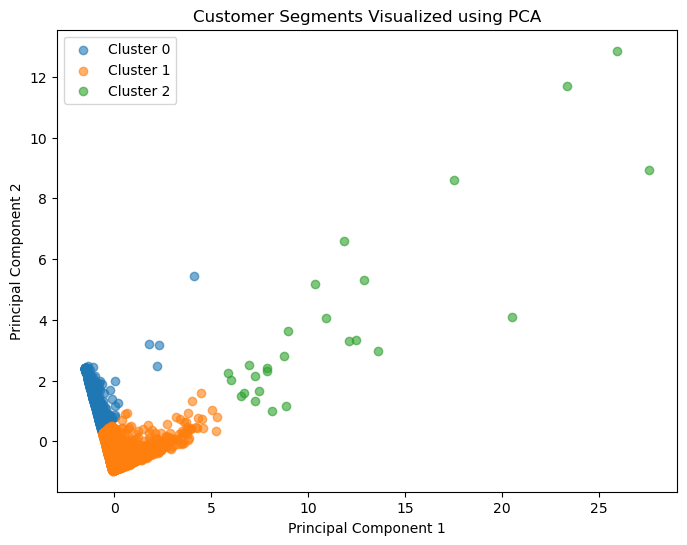

In [66]:
#PCA Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for cluster in pca_df['Cluster'].unique():
    plt.scatter(
        pca_df[pca_df['Cluster'] == cluster]['PCA1'],
        pca_df[pca_df['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.title('Customer Segments Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [67]:
### PCA Interpretation


# The PCA plot visualizes customer segments in a two-dimensional space using
# the first two principal components.

# The clusters formed using K-Means are clearly distinguishable,
# indicating that the RFM features capture meaningful differences in customer behavior.

# *Cluster 0 appears closely grouped, representing inactive or 
# low-value customers with similar purchasing patterns.

# *Cluster 1 shows moderate spread, indicating regular customers
# with varying purchase frequency and spending behavior.

# *Cluster 2 is more widely scattered, representing high-value customers with 
# significantly higher monetary value and distinct purchasing patterns.

# *Overall, PCA confirms that the selected features effectively separate customers into
# meaningful segments and supports the suitability of K-Means clustering for customer segmentation.

# Customer Segment Prediction using Decision Tree

In [68]:
### Why Decision Tree:
# Decision Tree is used to build a supervised learning model that predicts customer segments
# based on RFM values. This helps in automatically assigning new customers to predefined
# segments without re-running clustering.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [70]:
# Features and target
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Cluster']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [71]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9976958525345622
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       634
           2       0.75      1.00      0.86         6

    accuracy                           1.00       868
   macro avg       0.92      1.00      0.95       868
weighted avg       1.00      1.00      1.00       868



In [73]:
### Decision Tree Model Interpretation

# The Decision Tree classifier was trained to predict customer segments based on RFM features.
# The high accuracy indicates that the model successfully learned decision rules that closely
# approximate the cluster boundaries created by K-Means clustering.

# This model can be used in real-world applications to assign new customers to appropriate
# segments without re-running the clustering algorithm.

In [74]:
## Summary of Analytical Modeling

# In this, dimensionality reduction and supervised learning techniques were applied
# to strengthen the customer segmentation analysis.

# PCA enabled clear two-dimensional visualization of customer clusters, confirming effective
# separation based on RFM features.

# A Decision Tree classifier was trained to predict customer segments using RFM values.
# The high prediction accuracy indicates that the derived clusters are stable and can be
# reliably used for automated customer classification.

# This completes the analytical modeling phase of the project.

## Exporting Final Dataset for Visualization



In [ ]:
# The final clustered customer dataset is exported as a CSV file.
# This file will be used for Tableau dashboards, Streamlit application,
# project report evidence, and GitHub submission.

In [75]:
rfm.reset_index().to_csv("rfm_clustered_data.csv", index=False)